This notebook will calculate the observed fraction of times that it is providing power at a given time of day.

- create datetime index for all days
- aggregate by time
- plot and or logistic regression


In [68]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import WP19_analysis as wpa


# TODO: loop over filenames and output plots
filename = 'atamali'
energy_data = wpa.load_timeseries_file(filename + '-clean.csv')
messages = wpa.load_message_file(filename + '-messages.csv')

# create minute datetime index
index = pd.DatetimeIndex(start=wpa.get_start_time(energy_data),
                         end=wpa.get_end_time(energy_data),
                         freq='1T').values

power_down = messages[messages['message']=='Power Down'].index.values
power_up = messages[messages['message']=='Power Up'].index.values


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
on = []
for i in index:
    # if the insertion point of the index is one greater for the power_down time, you are in a gap
    if np.searchsorted(power_down, i) == np.searchsorted(power_up, i) + 1:
        on.append(0)
    else:
        on.append(1)

In [70]:
%matplotlib inline
on_off = pd.DataFrame(index=index, data=on)

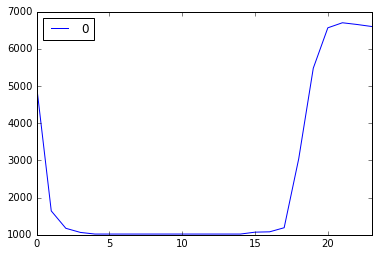

In [72]:
on_off.groupby(on_off.index.hour).sum().plot()

I don't actually believe the grid is on this much during the day.
There just isn't a reported gap during these times, which seems odd.